In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from metrics import *
from test import test
from tqdm import tqdm
from functions2 import *

# Figure Overall Range Performance

In [2]:
ira_matrix = []
frame_index = []
GT_range = []
GT_depth = []
range_raw_prediction = []   
range_KF_smoothed_prediction = []
range2_raw_prediction = []
range2_KF_smoothed_prediction = []

output_file_pathes = [
    'Outputs/HW101set1_sensor_1.pkl',
    'Outputs/HW101set2_sensor_1.pkl',
    'Outputs/HW101set3_sensor_1.pkl',
    'Outputs/HW101set4_sensor_1.pkl',
    'Outputs/HW101set5_sensor_1.pkl',
    'Outputs/HW101set6_sensor_1.pkl',
    'Outputs/HW101set7_sensor_1.pkl',
    'Outputs/HW101set8_sensor_1.pkl',
    'Outputs/HW101set9_sensor_1.pkl',
    'Outputs/HW101set10_sensor_1.pkl',
    'Outputs/HW101set11_sensor_1.pkl',
    'Outputs/HW101set12_sensor_1.pkl',
    'Outputs/HW101set13_sensor_1.pkl',
    'Outputs/HW101set14_sensor_1.pkl',
    'Outputs/HW101set15_sensor_1.pkl',
    'Outputs/HW101set16_sensor_1.pkl',
    'Outputs/HW101set17_sensor_1.pkl',
    'Outputs/HW101set18_sensor_1.pkl',
    'Outputs/HW101set19_sensor_1.pkl',
    'Outputs/HW101set20_sensor_1.pkl',
    'Outputs/HW101set21_sensor_1.pkl',
    'Outputs/HW101set22_sensor_1.pkl',
    'Outputs/HW101set23_sensor_1.pkl',
    'Outputs/HW101set24_sensor_1.pkl',
    'Outputs/HW101set29_sensor_1.pkl',
    'Outputs/HW101set30_sensor_1.pkl',
    'Outputs/HW101set31_sensor_1.pkl',
    'Outputs/HW101set32_sensor_1.pkl',
    'Outputs/HW101set33_sensor_1.pkl',
    'Outputs/HW101set34_sensor_1.pkl',
    'Outputs/HW101set35_sensor_1.pkl',
    'Outputs/HW101set36_sensor_1.pkl',
    'Outputs/HW101set37_sensor_1.pkl',
    'Outputs/HW101set38_sensor_1.pkl',
    'Outputs/HW101set39_sensor_1.pkl',
    'Outputs/HW101set40_sensor_1.pkl',
    'Outputs/HW101set41_sensor_1.pkl',
    'Outputs/HW101set42_sensor_1.pkl',
    'Outputs/HW101set43_sensor_1.pkl',
    'Outputs/HW101set44_sensor_1.pkl',
    'Outputs/HW101set45_sensor_1.pkl',
    'Outputs/HW101set46_sensor_1.pkl',
    'Outputs/HW101set47_sensor_1.pkl',
    'Outputs/HW101set48_sensor_1.pkl',
    'Outputs/HW101set49_sensor_1.pkl',
    'Outputs/HW101set50_sensor_1.pkl',
    'Outputs/HW101set51_sensor_1.pkl',
    'Outputs/HW101set52_sensor_1.pkl',
    'Outputs/HW101set53_sensor_1.pkl',
    'Outputs/HW101set54_sensor_1.pkl',
    'Outputs/HW101set55_sensor_1.pkl',
    'Outputs/HW101set56_sensor_1.pkl',
    'Outputs/HW101set57_sensor_1.pkl',
    'Outputs/HW101set58_sensor_1.pkl',
    'Outputs/HW101set59_sensor_1.pkl',
    'Outputs/HW101set60_sensor_1.pkl',
    'Outputs/HW101set61_sensor_1.pkl',

    'Outputs/Corridor2_3_sensor_1.pkl',
    'Outputs/Corridor2_4_sensor_1.pkl', 
    'Outputs/Corridor2_5_sensor_1.pkl',
    'Outputs/Corridor2_3_sensor_4.pkl',
    'Outputs/Corridor2_4_sensor_4.pkl', 
    'Outputs/Corridor2_5_sensor_4.pkl',
    
    'Outputs/Corridor3_0_sensor_1.pkl',  
    'Outputs/Corridor3_1_sensor_1.pkl',
    'Outputs/Corridor3_2_sensor_1.pkl',
    'Outputs/Corridor3_3_sensor_1.pkl',
    'Outputs/Corridor3_4_sensor_1.pkl', 
    'Outputs/Corridor3_5_sensor_1.pkl', 
    
    'Outputs/Corridor3_0_sensor_4.pkl',  
    'Outputs/Corridor3_1_sensor_4.pkl',
    'Outputs/Corridor3_2_sensor_4.pkl',
    'Outputs/Corridor3_3_sensor_4.pkl',
    'Outputs/Corridor3_4_sensor_4.pkl', 
    'Outputs/Corridor3_5_sensor_4.pkl',
    
    'Outputs/Hall_0_sensor_1.pkl', 
    'Outputs/Hall_1_sensor_1.pkl', 
    'Outputs/Hall_2_sensor_1.pkl', 

    'Outputs/Hall_0_sensor_4.pkl', 
    'Outputs/Hall_1_sensor_4.pkl', 
    'Outputs/Hall_2_sensor_4.pkl', 
    
    'Outputs/Meetingroom_0_sensor_1.pkl', 
    'Outputs/Meetingroom_1_sensor_1.pkl', 
    'Outputs/Meetingroom_2_sensor_1.pkl', 
    'Outputs/Meetingroom_3_sensor_1.pkl', 
    'Outputs/Meetingroom_4_sensor_1.pkl', 
    'Outputs/Meetingroom_5_sensor_1.pkl', 
    
    'Outputs/Meetingroom_0_sensor_4.pkl', 
    'Outputs/Meetingroom_1_sensor_4.pkl', 
    'Outputs/Meetingroom_2_sensor_4.pkl', 
    'Outputs/Meetingroom_3_sensor_4.pkl', 
    'Outputs/Meetingroom_4_sensor_4.pkl', 
    'Outputs/Meetingroom_5_sensor_4.pkl',
    
    'Outputs/Bedroom1_11_sensor_4.pkl',
    'Outputs/Bedroom1_12_sensor_4.pkl',
    'Outputs/Bedroom1_13_sensor_4.pkl',
    'Outputs/Bedroom1_14_sensor_4.pkl',
        
    'Outputs/Bathroom1_0_sensor_4.pkl',
    'Outputs/Bathroom1_1_sensor_4.pkl',
    'Outputs/Bathroom1_0_sensor_1.pkl',
    'Outputs/Bathroom1_1_sensor_1.pkl',
    ]

for file_path in tqdm(output_file_pathes):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    
    ira_matrix += output['ira_matrix']
    frame_index += output['frame_index']
    GT_range += output['GT_range']
    GT_depth += output['GT_depth']
    range_raw_prediction += output['range_raw_prediction']
    range_KF_smoothed_prediction += output['range_KF_smoothed_prediction']
    range2_raw_prediction += output['range2_raw_prediction']
    range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']


ira_matrix = np.array(ira_matrix)
frame_index = np.array(frame_index)
GT_depth = np.array(GT_depth)
GT_range = np.array(GT_range)
range_raw_prediction = np.array(range_raw_prediction)
range_KF_smoothed_prediction = np.array(range_KF_smoothed_prediction)
range2_raw_prediction = np.array(range2_raw_prediction)
range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)

# Finding the indices of the elements in both GT_range and GT_depth that are in [0.5,5] meters
GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

frame_index = frame_index[Valid_indices]
GT_range = GT_range[Valid_indices]
range_raw_prediction = range_raw_prediction[Valid_indices]
range_KF_smoothed_prediction = range_KF_smoothed_prediction[Valid_indices]
range2_raw_prediction = range2_raw_prediction[Valid_indices]
range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]


100%|██████████| 101/101 [00:01<00:00, 75.90it/s]


## Figure mean absolute error

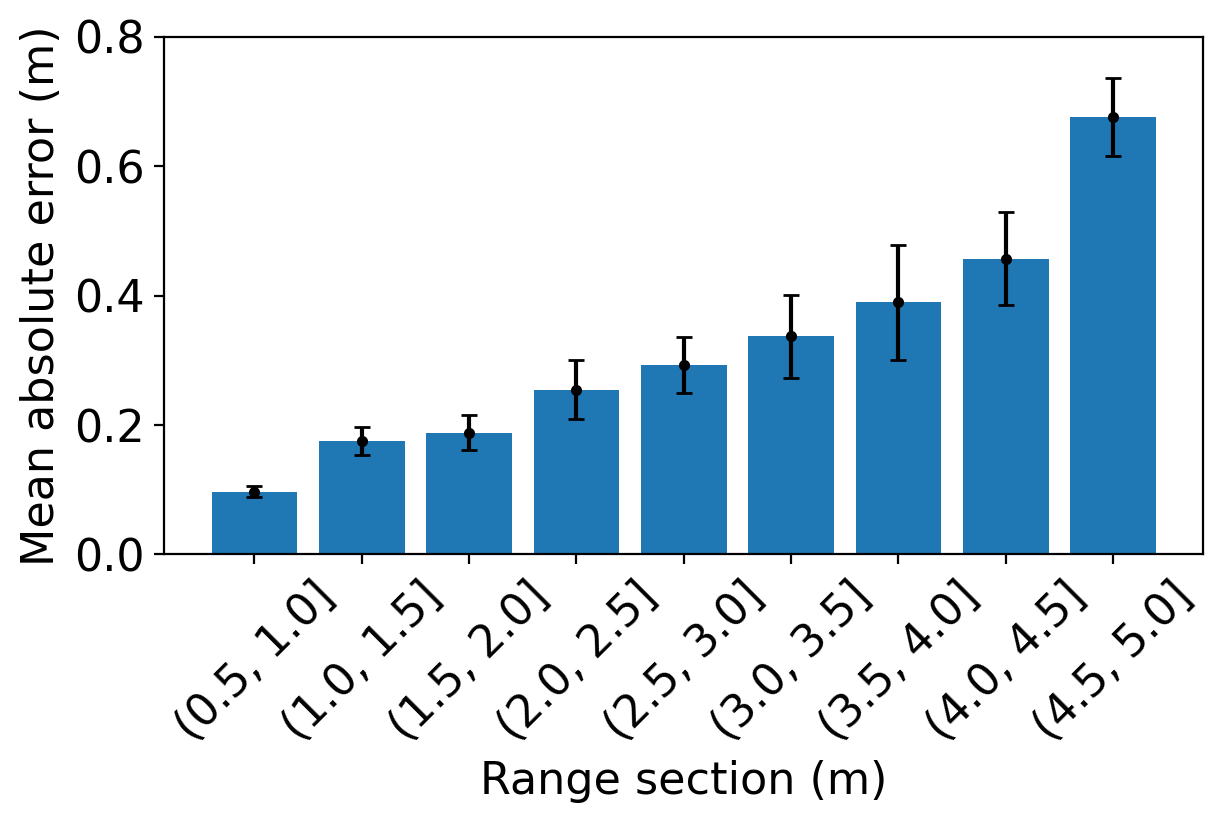

Overall MAE:  0.3185268462450259 m
mean MAE within 3m 0.20140867143779778 m
mean MAE in 3m to 4.5m  0.39449770365068515 m
mean MAE beyond 4m 0.5666456065019143 m


In [3]:

range_prediction = range2_KF_smoothed_prediction
GT = np.array(GT_range)
range2_mesSection, range2_mesSection_var = MAEAtEachSection(range_prediction ,GT)

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
plt.bar(np.arange(len(range2_mesSection)-1), range2_mesSection[1:], label='final_predictions',)
plt.errorbar(np.arange(len(range2_mesSection)-1), range2_mesSection[1:], yerr=range2_mesSection_var[1:],fmt='.', ecolor='k', color='k', capsize=3)
plt.xticks(np.arange(len(range2_mesSection)-1), [ '(0.5, 1.0]', '(1.0, 1.5]', '(1.5, 2.0]', '(2.0, 2.5]', '(2.5, 3.0]', '(3.0, 3.5]', '(3.5, 4.0]', '(4.0, 4.5]', '(4.5, 5.0]'])
plt.xticks(rotation=45)
plt.xlabel('Range section (m)')
plt.ylim(0.00, 0.8)
plt.ylabel('Mean absolute error (m)')
# plt.savefig("figures/overall-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/overall-range2" +'.pdf')
# plt.close()
plt.show()

print("Overall MAE: ", np.mean(range2_mesSection[1:]), "m")
print("mean MAE within 3m", np.mean(range2_mesSection[1:6]), "m")
print("mean MAE in 3m to 4.5m ", np.mean(range2_mesSection[6:9]), "m")
print("mean MAE beyond 4m", np.mean(range2_mesSection[8:]), "m")

## Figure CDF

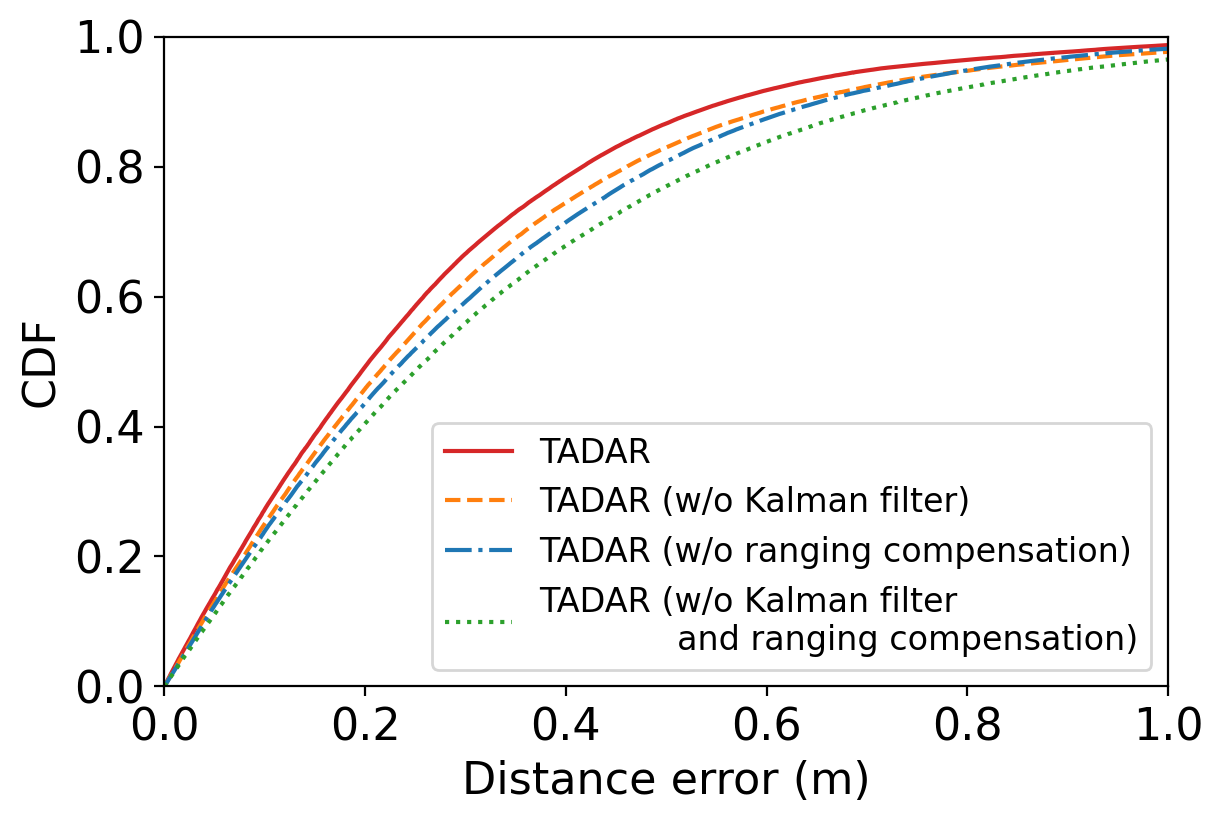

In [4]:
GT = np.array(GT_range)

range_unique_errors1, range_cdf_values1 = empirical_cdf(range_raw_prediction ,GT)
range_unique_errors2, range_cdf_values2 = empirical_cdf(range_KF_smoothed_prediction ,GT)
range_unique_errors3, range_cdf_values3 = empirical_cdf(range2_raw_prediction ,GT)
range_unique_errors4, range_cdf_values4 = empirical_cdf(range2_KF_smoothed_prediction ,GT)

# draw cdf of range and depth estimation error
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
plt.plot(range_unique_errors4,range_cdf_values4, label='TADAR', linestyle = 'solid', color = 'tab:red')
plt.plot(range_unique_errors3,range_cdf_values3, label='TADAR (w/o Kalman filter)', linestyle = 'dashed', color = 'tab:orange')
plt.plot(range_unique_errors2,range_cdf_values2, label='TADAR (w/o ranging compensation)', linestyle = 'dashdot', color = 'tab:blue')
plt.plot(range_unique_errors1,range_cdf_values1, label='TADAR (w/o Kalman filter \n             and ranging compensation)', linestyle = 'dotted', color = 'tab:green')
plt.xlabel('Distance error (m)')
plt.ylabel('CDF')
plt.rcParams.update({'font.size': 12})
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='lower right')
# plt.savefig("figures/overall-CDF" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/overall-CDF" +'.pdf')
# plt.close()
plt.show()

# find the index of the first element in range_cdf_values4 that is equal or greater than 0.8
index = np.where(range_cdf_values4 >= 0.8)[0][0]
# print("80% of the range estimation error is less than ", range_unique_errors4[index], "m")
    


# Figure Range Example

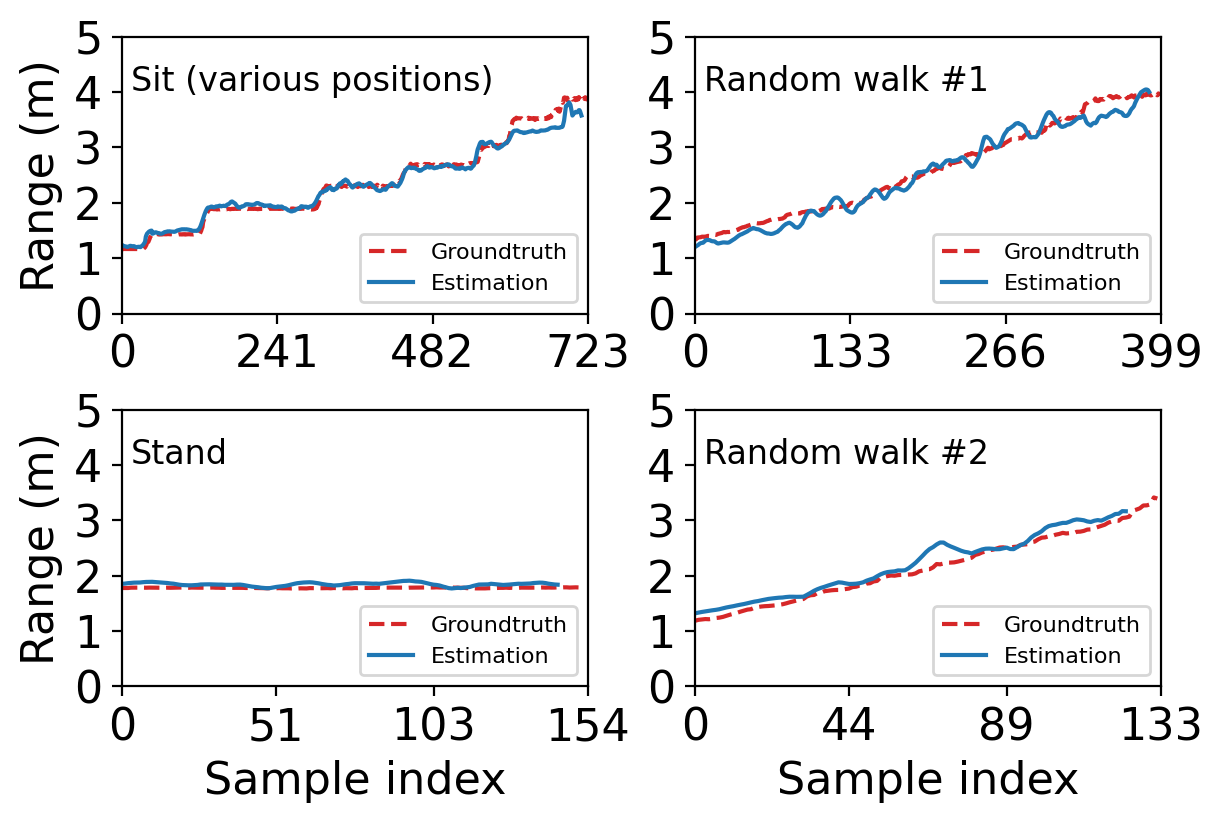

In [5]:

output_file_pathes = [
    'Outputs/HW101set24_sensor_1.pkl',   # sit
    'Outputs/HW101set30_sensor_1.pkl',    # walk
    'Outputs/HW101_Inangle_15D_2_sensor_1.pkl',     # stand
    'Outputs/HW101_ClothesTshirt_1_sensor_1.pkl',   # walk
    ]

text = ['Sit (various positions)', 'Random walk #1', 'Stand', 'Random walk #2']

r = np.array([224, 58, 0])/255
g = np.array([78, 189, 136])/255
b = np.array([64, 151, 219])/255
k = np.array([43, 41, 38])/255
n = np.array([104, 90, 92])/255
p = np.array([102, 8, 116])/255
color = [r, g, b, k, n, p]
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
# ax.yaxis.set_major_locator(plt.MaxNLocator(4))

for index,file_path in enumerate(output_file_pathes):
    plt.rcParams.update({'font.size': 16})
    subfig = plt.subplot(2,2,index+1)
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    
    GT_depth = np.array(output['GT_range'])
    GT_range = np.array(output['GT_depth'])
    range2_KF_smoothed_prediction = np.array(output['range2_KF_smoothed_prediction'])
    # Finding the indices of the elements in both GT_range and GT_depth that are in [0.5,5] meters
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)
    GT_range = GT_range[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]
    range2_KF_smoothed_prediction2 = sliding_window_average(range2_KF_smoothed_prediction, 10)
    plt.plot(GT_range[30:-30], label='Groundtruth' , linestyle = 'dashed', color = 'tab:red')
    plt.plot(range2_KF_smoothed_prediction2[30:-30], label='Estimation', linestyle = 'solid', color = "tab:blue")
    # only show four xticks
    xticks = np.linspace(0, len(GT_range[30:-30]), num = 4)
    xticks = np.around(xticks, decimals=0)
    plt.xticks(xticks)
    # put text on the upper right of plot
    plt.text(0.02, 0.9, text[index], horizontalalignment='left', verticalalignment='top', transform=subfig.transAxes, fontsize=12)
    if index == 0 or index == 2:
        plt.ylabel('Range (m)')
    if index == 2 or index == 3:
        plt.xlabel('Sample index')
    # plt.ylabel('Range (m)')
    plt.rcParams.update({'font.size': 8})
    plt.xlim([0, len(GT_range[30:-30])])
    plt.ylim([0, 5])
    plt.legend(loc='lower right')

# plt.savefig("figures/overall_range_sample" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/overall_range_sample" +'.pdf')
# plt.close()
plt.show()

# Figure Overall Detection Performance

100%|██████████| 6/6 [00:00<00:00, 60.12it/s]


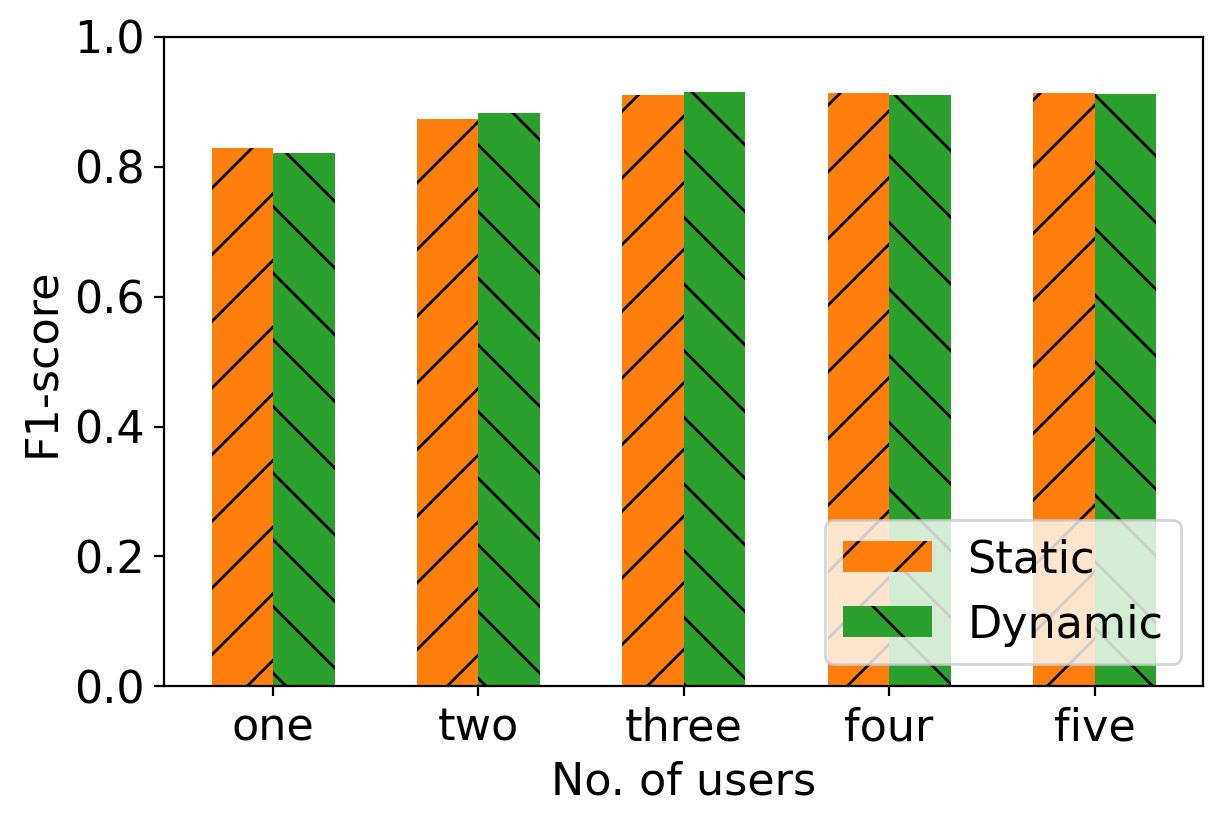

mean F1 score (static):  0.8877795659166907
mean F1 score (dynamic):  0.8882691826656268
mean F1 score (all scenarios):  0.8880243742911589


In [6]:

TruePositive = []
FalsePositive = []
FalseNegtive = []

One_person_static = [
    'Outputs/HW101set2_sensor_1.pkl',
    'Outputs/HW101set3_sensor_1.pkl',
    'Outputs/HW101set5_sensor_1.pkl',
    'Outputs/HW101set6_sensor_1.pkl',
    'Outputs/HW101set9_sensor_1.pkl',
    'Outputs/HW101set10_sensor_1.pkl',
    'Outputs/HW101set11_sensor_1.pkl',
    'Outputs/HW101set12_sensor_1.pkl',
    'Outputs/HW101set14_sensor_1.pkl',
    'Outputs/HW101set15_sensor_1.pkl',
    'Outputs/HW101set17_sensor_1.pkl',
    'Outputs/HW101set18_sensor_1.pkl',
    'Outputs/HW101set21_sensor_1.pkl',
    'Outputs/HW101set22_sensor_1.pkl',
    'Outputs/HW101set23_sensor_1.pkl',
    'Outputs/HW101set24_sensor_1.pkl',
    'Outputs/HW101set31_sensor_1.pkl',
    'Outputs/HW101set32_sensor_1.pkl',
    'Outputs/HW101set33_sensor_1.pkl',
    'Outputs/HW101set34_sensor_1.pkl',
    'Outputs/HW101set37_sensor_1.pkl',
    'Outputs/HW101set38_sensor_1.pkl',
    'Outputs/HW101set39_sensor_1.pkl',
    'Outputs/HW101set40_sensor_1.pkl',
]

One_person_dynamic = [
    'Outputs/HW101set1_sensor_1.pkl',
    'Outputs/HW101set4_sensor_1.pkl',

    'Outputs/HW101set7_sensor_1.pkl',
    'Outputs/HW101set8_sensor_1.pkl',

    'Outputs/HW101set13_sensor_1.pkl',

    'Outputs/HW101set16_sensor_1.pkl',

    'Outputs/HW101set19_sensor_1.pkl',
    'Outputs/HW101set20_sensor_1.pkl',

    'Outputs/HW101set29_sensor_1.pkl',
    'Outputs/HW101set30_sensor_1.pkl',

    'Outputs/HW101set35_sensor_1.pkl',
    'Outputs/HW101set36_sensor_1.pkl',
]

two_person_static = [
    'Outputs/HW101set45_sensor_1.pkl',
    'Outputs/HW101set46_sensor_1.pkl',
    'Outputs/HW101set47_sensor_1.pkl',
    'Outputs/HW101set48_sensor_1.pkl',
    'Outputs/HW101set49_sensor_1.pkl',
    'Outputs/HW101set50_sensor_1.pkl',
    'Outputs/HW101set51_sensor_1.pkl',
    'Outputs/HW101set52_sensor_1.pkl',
]

two_person_dynamic = [
    'Outputs/HW101set41_sensor_1.pkl',
    'Outputs/HW101set42_sensor_1.pkl',
    'Outputs/HW101set43_sensor_1.pkl',
    'Outputs/HW101set44_sensor_1.pkl',
]

three_person_static = [
    'Outputs/HW101set56_sensor_1.pkl',
    'Outputs/HW101set57_sensor_1.pkl',
    'Outputs/HW101set58_sensor_1.pkl',
    'Outputs/HW101set59_sensor_1.pkl',
    'Outputs/HW101set60_sensor_1.pkl',
    'Outputs/HW101set61_sensor_1.pkl',
]

three_person_dynamic = [
    'Outputs/HW101set53_sensor_1.pkl',
    'Outputs/HW101set54_sensor_1.pkl',
    'Outputs/HW101set55_sensor_1.pkl',
]


four_person_static = [
    'Outputs/FourUser_Static_0_sensor_4.pkl',
    'Outputs/FourUser_Static_1_sensor_4.pkl',
    'Outputs/FourUser_Static_2_sensor_4.pkl',
    'Outputs/FourUser_Static_3_sensor_4.pkl',
    'Outputs/FourUser_Static_4_sensor_4.pkl',
]

four_person_dynamic = [
    'Outputs/FourUser_Dynamic_0_sensor_4.pkl',
    'Outputs/FourUser_Dynamic_1_sensor_4.pkl',
    'Outputs/FourUser_Dynamic_2_sensor_4.pkl',
    'Outputs/FourUser_Dynamic_3_sensor_4.pkl',
    'Outputs/FourUser_Dynamic_4_sensor_4.pkl',
]

five_person_static = [
    'Outputs/FiveUser_Static_0_sensor_4.pkl',
    'Outputs/FiveUser_Static_1_sensor_4.pkl',
    'Outputs/FiveUser_Static_2_sensor_4.pkl',
    'Outputs/FiveUser_Static_3_sensor_4.pkl',
    'Outputs/FiveUser_Static_4_sensor_4.pkl',
    'Outputs/FiveUser_Static_5_sensor_4.pkl',
]

five_person_dynamic = [
    'Outputs/FiveUser_Dynamic_0_sensor_4.pkl', 
    'Outputs/FiveUser_Dynamic_1_sensor_4.pkl',
    'Outputs/FiveUser_Dynamic_2_sensor_4.pkl',
    'Outputs/FiveUser_Dynamic_3_sensor_4.pkl',
    'Outputs/FiveUser_Dynamic_4_sensor_4.pkl',
    'Outputs/FiveUser_Dynamic_5_sensor_4.pkl',
] 

    
for file_path in tqdm(One_person_static):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
One_person_static_precision, One_person_static_recall, One_person_static_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(One_person_dynamic):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
One_person_dynamic_precision, One_person_dynamic_recall, One_person_dynamic_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(two_person_static):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
two_person_static_precision, two_person_static_recall, two_person_static_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(two_person_dynamic):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
two_person_dynamic_precision, two_person_dynamic_recall, two_person_dynamic_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(three_person_static):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
three_person_static_precision, three_person_static_recall, three_person_static_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(three_person_dynamic):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
three_person_dynamic_precision, three_person_dynamic_recall, three_person_dynamic_F1_score = DetectionMeasurements(TP, FP, FN)


for file_path in tqdm(four_person_static):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
four_person_static_precision, four_person_static_recall, four_person_static_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(four_person_dynamic):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
four_person_dynamic_precision, four_person_dynamic_recall, four_person_dynamic_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(five_person_static):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
five_person_static_precision, five_person_static_recall, five_person_static_F1_score = DetectionMeasurements(TP, FP, FN)

for file_path in tqdm(five_person_dynamic):
    file = open(file_path, "rb")
    output = pickle.load(file)
    file.close()
    TruePositive += output['TruePositive']
    FalsePositive += output['FalsePositive']
    FalseNegtive += output['FalseNegtive']

TP = np.sum(np.array(TruePositive))
FP = np.sum(np.array(FalsePositive))
FN = np.sum(np.array(FalseNegtive))
five_person_dynamic_precision, five_person_dynamic_recall, five_person_dynamic_F1_score = DetectionMeasurements(TP, FP, FN)


# visualizing F1 score
static = [One_person_static_F1_score, two_person_static_F1_score, three_person_static_F1_score, four_person_static_F1_score, five_person_static_F1_score]
dynamic = [One_person_dynamic_F1_score, two_person_dynamic_F1_score, three_person_dynamic_F1_score, four_person_dynamic_F1_score, five_person_dynamic_F1_score]

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.3  # the width of the bars
plt.bar(np.arange(len(static))+ width*(-0.5) , static, width,label='Static', color="tab:orange", hatch="/")
plt.bar(np.arange(len(dynamic))+ width*(0.5) , dynamic,width, label='Dynamic', color='tab:green', hatch="\\")

plt.xticks(np.arange(len(dynamic)), ['one', 'two', 'three', 'four', 'five'])
plt.legend(loc='lower right')
plt.xlabel('No. of users')
plt.ylabel('F1-score')
plt.ylim([0,1])

# plt.savefig("figures/overall-detection3" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/overall-detection3" +'.pdf')
plt.show() 

# print the mean F1 score over all scenarios
print("mean F1 score (static): ", np.mean(static))
print("mean F1 score (dynamic): ", np.mean(dynamic))
all_scenarios = static + dynamic
print("mean F1 score (all scenarios): ", np.mean(all_scenarios))



# Figure Cross-user Performance

100%|██████████| 6/6 [00:00<00:00, 195.51it/s]


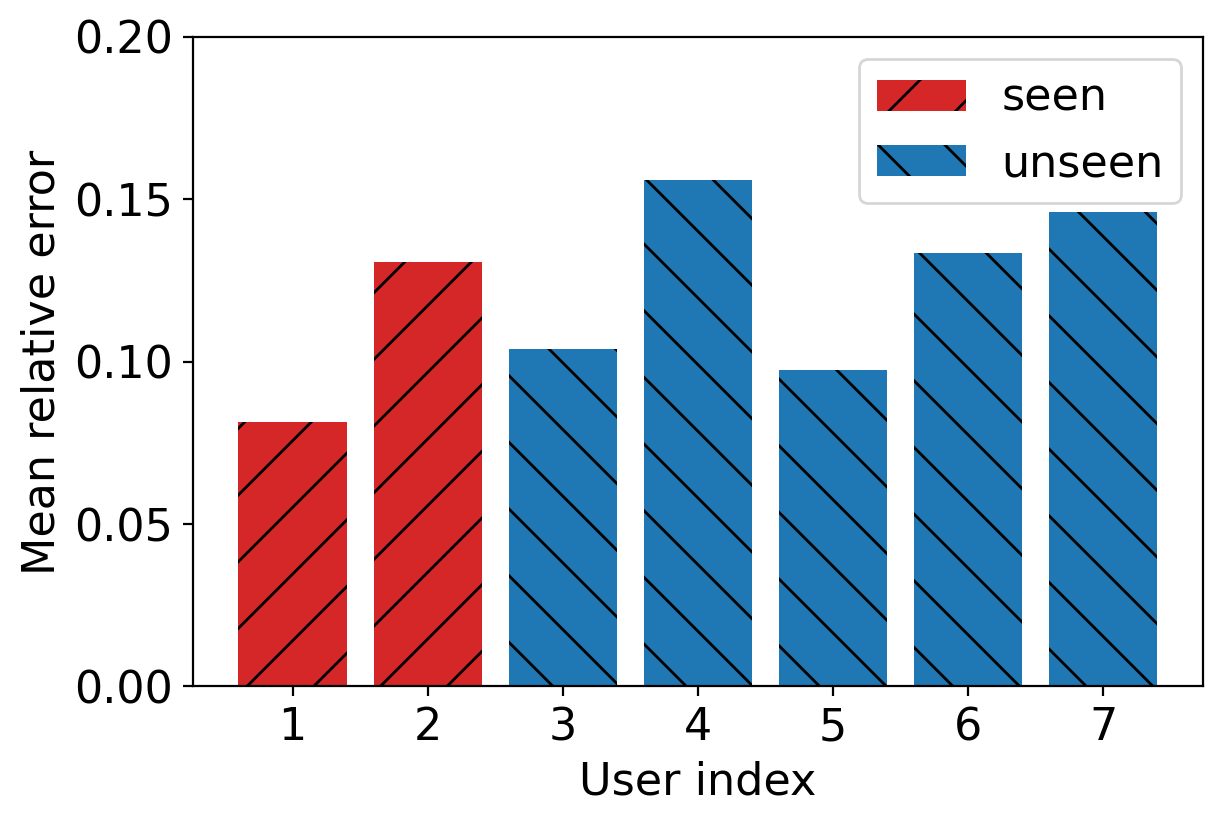

mean relative errors [0.08125432123103431, 0.13069946252343526, 0.1039453338225886, 0.15577551956132069, 0.09732228679869263, 0.13339282902914237, 0.14603500035467434]


In [7]:

u1_seen = [
    'Outputs/HW101set7_sensor_1.pkl',
    'Outputs/HW101set8_sensor_1.pkl',
    'Outputs/HW101set9_sensor_1.pkl',
    'Outputs/HW101set10_sensor_1.pkl',
    'Outputs/HW101set11_sensor_1.pkl',
    'Outputs/HW101set12_sensor_1.pkl',
]

u2_seen = [
    'Outputs/HW101set1_sensor_1.pkl',
    'Outputs/HW101set3_sensor_1.pkl',
    'Outputs/HW101set4_sensor_1.pkl',
    'Outputs/HW101set5_sensor_1.pkl',
    'Outputs/HW101set6_sensor_1.pkl',
]

u3 = [
    'Outputs/HW101set16_sensor_1.pkl',
    'Outputs/HW101set17_sensor_1.pkl',
    'Outputs/HW101set18_sensor_1.pkl',
]

u4 = [
    'Outputs/HW101set13_sensor_1.pkl',
    'Outputs/HW101set14_sensor_1.pkl',
    'Outputs/HW101set15_sensor_1.pkl',
]

u5 = [
    'Outputs/HW101set19_sensor_1.pkl',
    'Outputs/HW101set20_sensor_1.pkl',
    'Outputs/HW101set21_sensor_1.pkl',
    'Outputs/HW101set22_sensor_1.pkl',
    'Outputs/HW101set23_sensor_1.pkl',
    'Outputs/HW101set24_sensor_1.pkl',
]

u6 = [
    'Outputs/HW101set35_sensor_1.pkl',
    'Outputs/HW101set36_sensor_1.pkl',
    'Outputs/HW101set37_sensor_1.pkl',
    'Outputs/HW101set38_sensor_1.pkl',
]

u7 = [
    'Outputs/HW101set29_sensor_1.pkl',
    'Outputs/HW101set30_sensor_1.pkl',
    'Outputs/HW101set31_sensor_1.pkl',
    'Outputs/HW101set32_sensor_1.pkl',
    'Outputs/HW101set33_sensor_1.pkl',
    'Outputs/HW101set34_sensor_1.pkl', 
]

performance_are = []
users = [u1_seen, u2_seen, u3, u4, u5, u6, u7]
for user in users:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    for file_path in tqdm(user):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']

    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
plt.bar(np.arange(len(performance_are)) , performance_are, color="tab:blue")
plt.xticks(np.arange(len(performance_are)), ['1', '2', '3', '4', '5', '6', '7'])
# set the first two bar with color red and the rest with color blue
ax.patches[0].set_facecolor('tab:red')
ax.patches[1].set_facecolor('tab:red')
ax.patches[2].set_facecolor('tab:blue')
ax.patches[3].set_facecolor('tab:blue')
ax.patches[4].set_facecolor('tab:blue')
ax.patches[5].set_facecolor('tab:blue')
ax.patches[6].set_facecolor('tab:blue')
# give the red bars a label: 'seen' and the blue bars a label: 'unseen'
ax.patches[0].set_label('seen')
ax.patches[1].set_label('seen')
ax.patches[2].set_label('unseen')
ax.patches[3].set_label('unseen')
ax.patches[4].set_label('unseen')
ax.patches[5].set_label('unseen')
ax.patches[6].set_label('unseen')
# give the red bars a hatch pattern
ax.patches[0].set_hatch('/')
ax.patches[1].set_hatch('/')
ax.patches[2].set_hatch('\\')
ax.patches[3].set_hatch('\\')
ax.patches[4].set_hatch('\\')
ax.patches[5].set_hatch('\\')
ax.patches[6].set_hatch('\\')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:3], labels[1:3], loc='upper right')
# set the title
plt.xlabel('User index')
plt.ylabel('Mean relative error')
plt.ylim([0,0.2])

# plt.savefig("figures/cross-user-range-mre2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-user-range-mre2" +'.pdf')
# plt.close()

plt.show()     
    
print('mean relative errors', performance_are)

# Figure Cross-env Performance

100%|██████████| 4/4 [00:00<00:00, 288.25it/s]


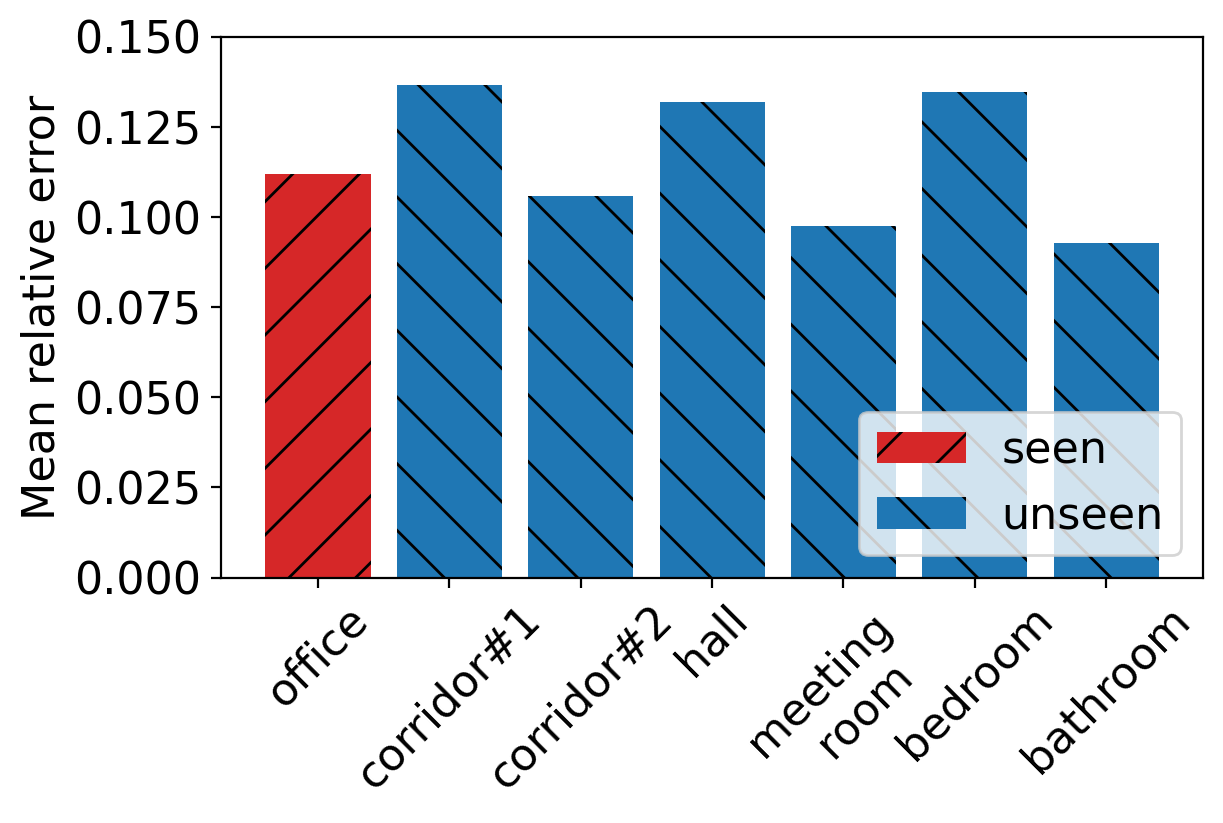

[0.11184989758641277, 0.13654748600127922, 0.1058843661893993, 0.13195068056792952, 0.09748064930326185, 0.1345503603306182, 0.092844043589627]


In [8]:

office = [
    'Outputs/HW101set1_sensor_1.pkl',
    'Outputs/HW101set2_sensor_1.pkl',
    'Outputs/HW101set3_sensor_1.pkl',
    'Outputs/HW101set4_sensor_1.pkl',
    'Outputs/HW101set5_sensor_1.pkl',
    'Outputs/HW101set6_sensor_1.pkl',
    'Outputs/HW101set7_sensor_1.pkl',
    'Outputs/HW101set8_sensor_1.pkl',
    'Outputs/HW101set9_sensor_1.pkl',
    'Outputs/HW101set10_sensor_1.pkl',
    'Outputs/HW101set11_sensor_1.pkl',
    'Outputs/HW101set12_sensor_1.pkl',
    'Outputs/HW101set13_sensor_1.pkl',
    'Outputs/HW101set14_sensor_1.pkl',
    'Outputs/HW101set15_sensor_1.pkl',
    'Outputs/HW101set16_sensor_1.pkl',
    'Outputs/HW101set17_sensor_1.pkl',
    'Outputs/HW101set18_sensor_1.pkl',
    'Outputs/HW101set19_sensor_1.pkl',
    'Outputs/HW101set20_sensor_1.pkl',
    'Outputs/HW101set21_sensor_1.pkl',
    'Outputs/HW101set22_sensor_1.pkl',
    'Outputs/HW101set23_sensor_1.pkl',
    'Outputs/HW101set24_sensor_1.pkl',
    'Outputs/HW101set29_sensor_1.pkl',
    'Outputs/HW101set30_sensor_1.pkl',
    'Outputs/HW101set31_sensor_1.pkl',
    'Outputs/HW101set32_sensor_1.pkl',
    'Outputs/HW101set33_sensor_1.pkl',
    'Outputs/HW101set34_sensor_1.pkl',
    'Outputs/HW101set35_sensor_1.pkl',
    'Outputs/HW101set36_sensor_1.pkl',
    'Outputs/HW101set37_sensor_1.pkl',
    'Outputs/HW101set38_sensor_1.pkl',
    'Outputs/HW101set39_sensor_1.pkl',
    'Outputs/HW101set40_sensor_1.pkl',
    'Outputs/HW101set41_sensor_1.pkl',
    'Outputs/HW101set42_sensor_1.pkl',
    'Outputs/HW101set43_sensor_1.pkl',
    'Outputs/HW101set44_sensor_1.pkl',
    'Outputs/HW101set45_sensor_1.pkl',
    'Outputs/HW101set46_sensor_1.pkl',
    'Outputs/HW101set47_sensor_1.pkl',
    'Outputs/HW101set48_sensor_1.pkl',
    'Outputs/HW101set49_sensor_1.pkl',
    'Outputs/HW101set50_sensor_1.pkl',
    'Outputs/HW101set51_sensor_1.pkl',
    'Outputs/HW101set52_sensor_1.pkl',
    'Outputs/HW101set53_sensor_1.pkl',
    'Outputs/HW101set54_sensor_1.pkl',
    'Outputs/HW101set55_sensor_1.pkl',
    'Outputs/HW101set56_sensor_1.pkl',
    'Outputs/HW101set57_sensor_1.pkl',
    'Outputs/HW101set58_sensor_1.pkl',
    'Outputs/HW101set59_sensor_1.pkl',
    'Outputs/HW101set60_sensor_1.pkl',
    'Outputs/HW101set61_sensor_1.pkl',
]


corridor1 = [
    'Outputs/Corridor2_3_sensor_1.pkl',
    'Outputs/Corridor2_4_sensor_1.pkl', 
    'Outputs/Corridor2_5_sensor_1.pkl',
    'Outputs/Corridor2_3_sensor_4.pkl',
    'Outputs/Corridor2_4_sensor_4.pkl', 
    'Outputs/Corridor2_5_sensor_4.pkl',
]

corridor2 = [
    'Outputs/Corridor3_0_sensor_1.pkl',  
    'Outputs/Corridor3_1_sensor_1.pkl',
    'Outputs/Corridor3_2_sensor_1.pkl',
    'Outputs/Corridor3_3_sensor_1.pkl',
    'Outputs/Corridor3_4_sensor_1.pkl', 
    'Outputs/Corridor3_5_sensor_1.pkl', 
    
    'Outputs/Corridor3_0_sensor_4.pkl',  
    'Outputs/Corridor3_1_sensor_4.pkl',
    'Outputs/Corridor3_2_sensor_4.pkl',
    'Outputs/Corridor3_3_sensor_4.pkl',
    'Outputs/Corridor3_4_sensor_4.pkl', 
    'Outputs/Corridor3_5_sensor_4.pkl', 
]

hall = [
    'Outputs/Hall_0_sensor_1.pkl', 
    'Outputs/Hall_1_sensor_1.pkl', 
    'Outputs/Hall_2_sensor_1.pkl', 
    'Outputs/Hall_0_sensor_4.pkl', 
    'Outputs/Hall_1_sensor_4.pkl', 
    'Outputs/Hall_2_sensor_4.pkl', 
]

meetingroom = [
    'Outputs/Meetingroom_0_sensor_1.pkl', 
    'Outputs/Meetingroom_1_sensor_1.pkl', 
    'Outputs/Meetingroom_2_sensor_1.pkl', 
    'Outputs/Meetingroom_3_sensor_1.pkl', 
    'Outputs/Meetingroom_4_sensor_1.pkl', 
    'Outputs/Meetingroom_5_sensor_1.pkl', 
    
    'Outputs/Meetingroom_0_sensor_4.pkl', 
    'Outputs/Meetingroom_1_sensor_4.pkl', 
    'Outputs/Meetingroom_2_sensor_4.pkl', 
    'Outputs/Meetingroom_3_sensor_4.pkl', 
    'Outputs/Meetingroom_4_sensor_4.pkl', 
    'Outputs/Meetingroom_5_sensor_4.pkl', 
]

bedroom = [
    'Outputs/Bedroom1_11_sensor_4.pkl',
    'Outputs/Bedroom1_12_sensor_4.pkl',
    'Outputs/Bedroom1_13_sensor_4.pkl',
    'Outputs/Bedroom1_14_sensor_4.pkl', 
]

bathroom =[
    'Outputs/Bathroom1_0_sensor_4.pkl',
    'Outputs/Bathroom1_1_sensor_4.pkl',
    'Outputs/Bathroom1_0_sensor_1.pkl',
    'Outputs/Bathroom1_1_sensor_1.pkl', 
]


performance_are = []
performance_are_std = []
envs = [ office, corridor1, corridor2, hall, meetingroom, bedroom, bathroom,]
for env in envs:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    for file_path in tqdm(env):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']

    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
plt.bar(np.arange(len(performance_are)) , performance_are, color="tab:blue")
# plt.errorbar(np.arange(len(performance_are)), performance_are, yerr=performance_are_std, fmt='o', ecolor='k', color = 'k', capsize=3)
plt.xticks(np.arange(len(performance_are)), [ 'office', 'corridor#1', 'corridor#2', 'hall', 'meeting \n room', 'bedroom', 'bathroom',])
# set the first two bar with color red and the rest with color blue
ax.patches[0].set_facecolor('tab:red')
ax.patches[1].set_facecolor('tab:blue')
ax.patches[2].set_facecolor('tab:blue')
ax.patches[3].set_facecolor('tab:blue')
ax.patches[4].set_facecolor('tab:blue')
ax.patches[5].set_facecolor('tab:blue')
ax.patches[6].set_facecolor('tab:blue')
# give the red bars a label: 'seen' and the blue bars a label: 'unseen'
ax.patches[0].set_label('seen')
ax.patches[1].set_label('unseen')
ax.patches[2].set_label('unseen')
ax.patches[3].set_label('unseen')
ax.patches[4].set_label('unseen')
ax.patches[5].set_label('unseen')
ax.patches[6].set_label('unseen')
# give the red bars a hatch pattern
ax.patches[0].set_hatch('/')
ax.patches[1].set_hatch('\\')
ax.patches[2].set_hatch('\\')
ax.patches[3].set_hatch('\\')
ax.patches[4].set_hatch('\\')
ax.patches[5].set_hatch('\\')
ax.patches[6].set_hatch('\\')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='lower right')
plt.xticks(rotation=45)
plt.ylabel('Mean relative error')
plt.ylim([0,0.15])

# plt.savefig("figures/cross-env-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-env-range2" +'.pdf')
# plt.close()

plt.show()  

print(performance_are)

# Figure Cross-activity Performance

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 70.29it/s] 


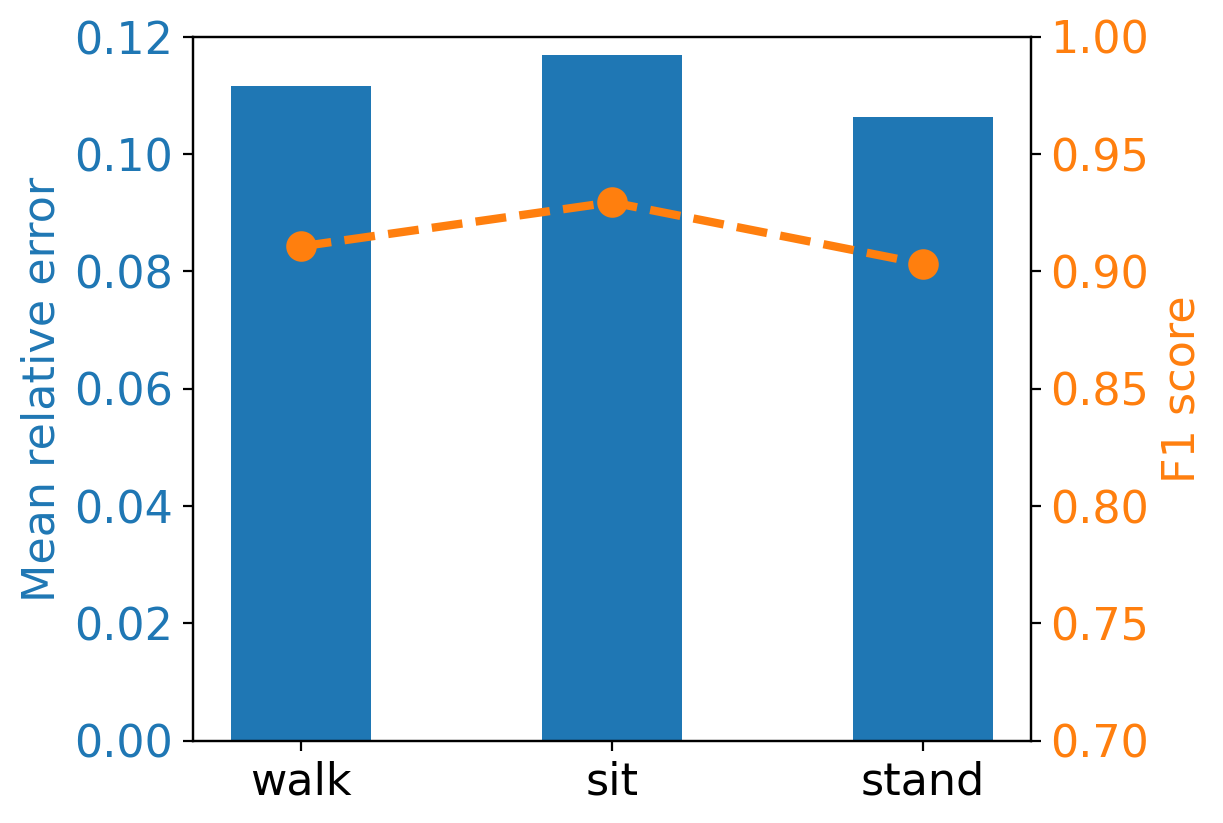

[0.1116742070671502, 0.1168848151354424, 0.10624136767906078]
[0.910598236554607, 0.929402875829339, 0.9031776972487866]


In [9]:
walk = [
    'Outputs/HW101set1_sensor_1.pkl',
    'Outputs/HW101set4_sensor_1.pkl',
    'Outputs/HW101set7_sensor_1.pkl',
    'Outputs/HW101set8_sensor_1.pkl',
    'Outputs/HW101set13_sensor_1.pkl',
    'Outputs/HW101set16_sensor_1.pkl',
    'Outputs/HW101set19_sensor_1.pkl',
    'Outputs/HW101set20_sensor_1.pkl',
    'Outputs/HW101set29_sensor_1.pkl',
    'Outputs/HW101set30_sensor_1.pkl',
    'Outputs/HW101set35_sensor_1.pkl',
    'Outputs/HW101set36_sensor_1.pkl',
    'Outputs/HW101set41_sensor_1.pkl',
    'Outputs/HW101set42_sensor_1.pkl',
    'Outputs/HW101set43_sensor_1.pkl',
    'Outputs/HW101set44_sensor_1.pkl',
    'Outputs/HW101set53_sensor_1.pkl',
    'Outputs/HW101set54_sensor_1.pkl',
    'Outputs/HW101set55_sensor_1.pkl',
]

sit = [
    'Outputs/HW101set5_sensor_1.pkl',
    'Outputs/HW101set6_sensor_1.pkl',
    'Outputs/HW101set11_sensor_1.pkl',
    'Outputs/HW101set12_sensor_1.pkl',
    'Outputs/HW101set15_sensor_1.pkl',
    'Outputs/HW101set18_sensor_1.pkl',
    'Outputs/HW101set23_sensor_1.pkl',
    'Outputs/HW101set24_sensor_1.pkl',
    'Outputs/HW101set33_sensor_1.pkl',
    'Outputs/HW101set34_sensor_1.pkl',
    'Outputs/HW101set39_sensor_1.pkl',
    'Outputs/HW101set40_sensor_1.pkl',
    'Outputs/HW101set49_sensor_1.pkl',
    'Outputs/HW101set50_sensor_1.pkl',
    'Outputs/HW101set51_sensor_1.pkl',
    'Outputs/HW101set52_sensor_1.pkl',
    'Outputs/HW101set59_sensor_1.pkl',
    'Outputs/HW101set60_sensor_1.pkl',
    'Outputs/HW101set61_sensor_1.pkl',
]

stand = [
    'Outputs/HW101set2_sensor_1.pkl',
    'Outputs/HW101set3_sensor_1.pkl',
    'Outputs/HW101set9_sensor_1.pkl',
    'Outputs/HW101set10_sensor_1.pkl',
    'Outputs/HW101set14_sensor_1.pkl',
    'Outputs/HW101set17_sensor_1.pkl',
    'Outputs/HW101set21_sensor_1.pkl',
    'Outputs/HW101set22_sensor_1.pkl',
    'Outputs/HW101set31_sensor_1.pkl',
    'Outputs/HW101set32_sensor_1.pkl',
    'Outputs/HW101set37_sensor_1.pkl',
    'Outputs/HW101set38_sensor_1.pkl',
    'Outputs/HW101set45_sensor_1.pkl',
    'Outputs/HW101set46_sensor_1.pkl',
    'Outputs/HW101set47_sensor_1.pkl',
    'Outputs/HW101set48_sensor_1.pkl',
    'Outputs/HW101set56_sensor_1.pkl',
    'Outputs/HW101set57_sensor_1.pkl',
    'Outputs/HW101set58_sensor_1.pkl',
]

performance_are = []
performance_are_std = []
performance_f1score = []
activities = [walk, sit, stand]
for act in activities:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(act):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
        
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0.7, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0, 0.12])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), ['walk', 'sit', 'stand'])
# plt.savefig("figures/cross-activity-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-activity-range2" +'.pdf')
# plt.close()

plt.show() 

print(performance_are)
print(performance_f1score)

# Figure Cross-clothes Performance

100%|██████████| 3/3 [00:00<00:00, 220.18it/s]


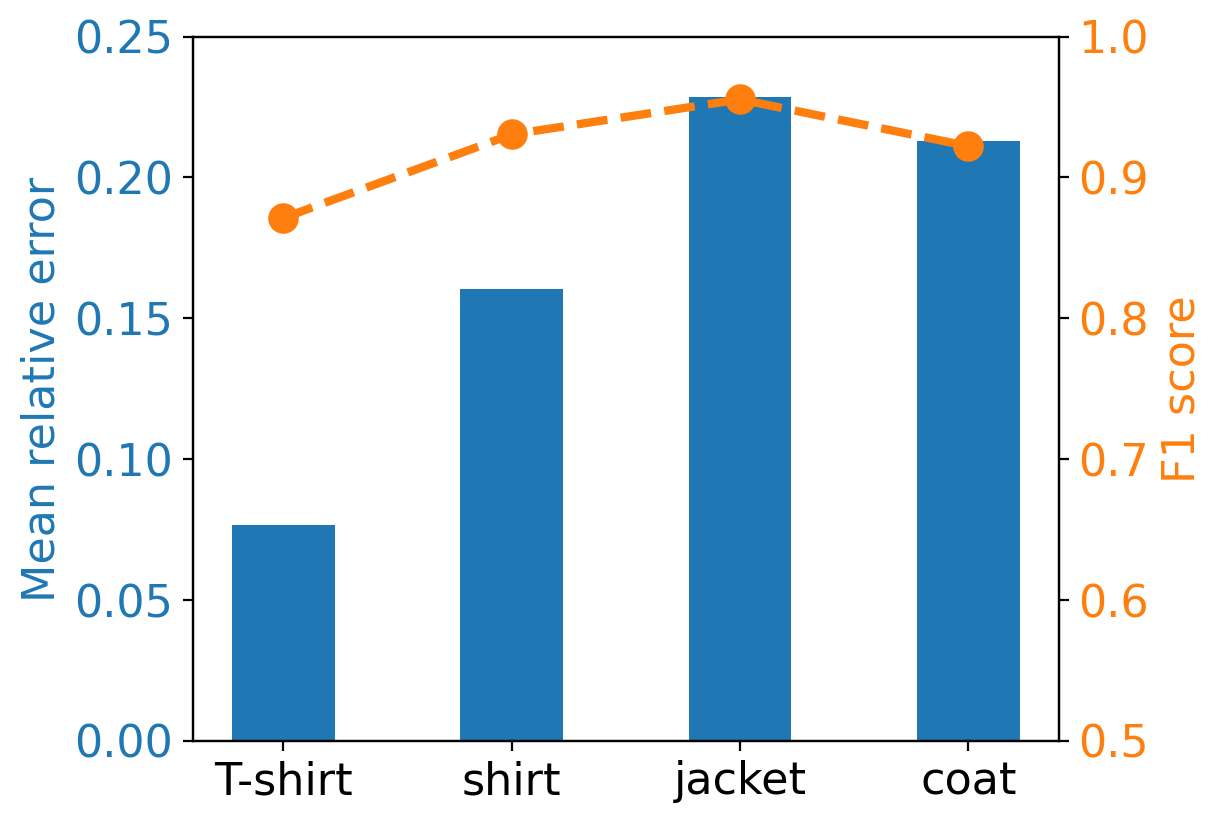

[0.07660745277579174, 0.16035344343441799, 0.22866038559507706, 0.21277085536202867]
[0.8712121212121212, 0.9305451829723674, 0.9554367201426026, 0.9222488038277512]


In [10]:
coat = [
    'Outputs/HW101_ClothesCoat_0_sensor_1.pkl',
    'Outputs/HW101_ClothesCoat_1_sensor_1.pkl',
    'Outputs/HW101_ClothesCoat_2_sensor_1.pkl',
]

jacket = [
    'Outputs/HW101_ClothesJacket_0_sensor_1.pkl',
    'Outputs/HW101_ClothesJacket_1_sensor_1.pkl',
    'Outputs/HW101_ClothesJacket_2_sensor_1.pkl',
]

shirt = [
    'Outputs/HW101_ClothesShirt_0_sensor_1.pkl',
    'Outputs/HW101_ClothesShirt_1_sensor_1.pkl',
    'Outputs/HW101_ClothesShirt_2_sensor_1.pkl',
]

tshirt = [
    'Outputs/HW101_ClothesTshirt_0_sensor_1.pkl',
    'Outputs/HW101_ClothesTshirt_1_sensor_1.pkl',
    'Outputs/HW101_ClothesTshirt_2_sensor_1.pkl',
]

performance_are = []
performance_are_std = []
performance_f1score = []
clothes = [tshirt, shirt, jacket, coat]
for ele in clothes:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
        
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0.5, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0, 0.25])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), ['T-shirt', 'shirt', 'jacket', 'coat'])

# plt.savefig("figures/cross-clothes-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-clothes-range2" +'.pdf')
# plt.close()

plt.show() 
print(performance_are)
print(performance_f1score)

# Figure Cross-orientation Performance

100%|██████████| 6/6 [00:00<00:00, 166.67it/s]


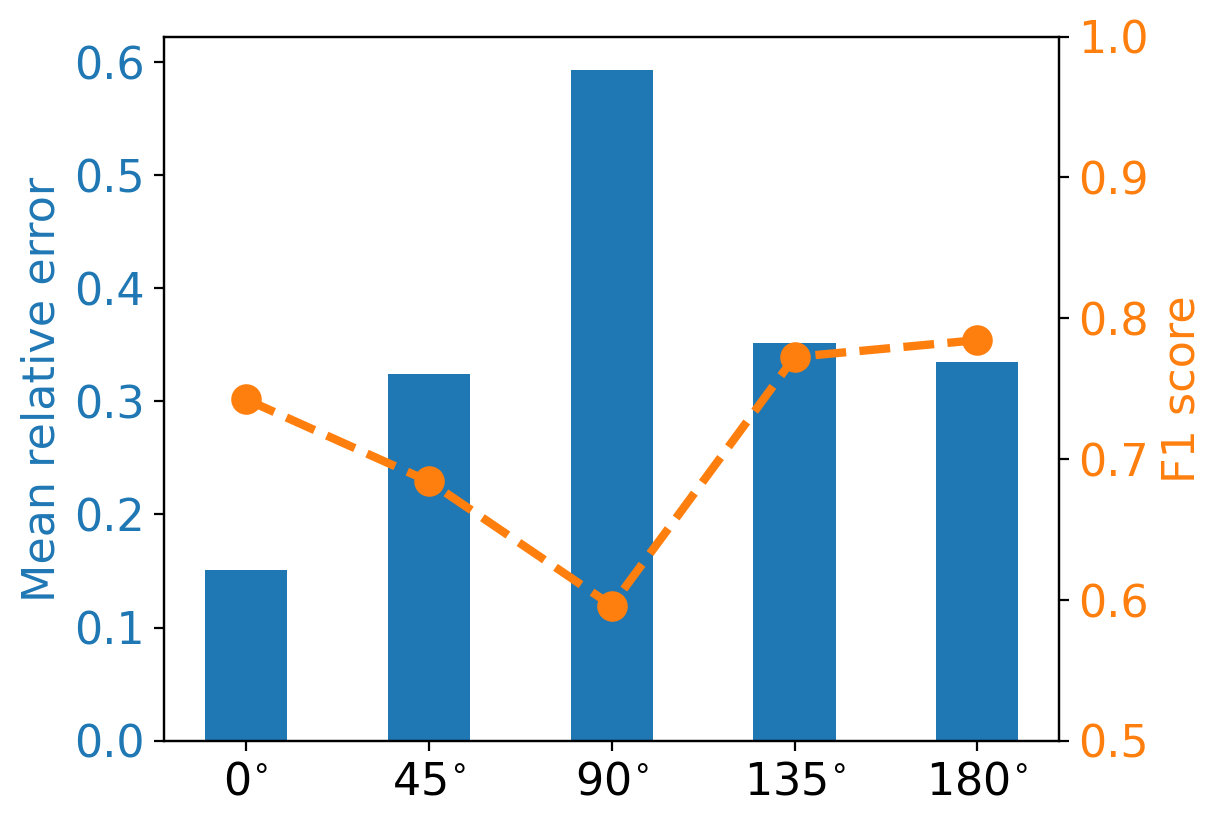

[0.15102975331002727, 0.32408443971879425, 0.5930177806353635, 0.35149873512815366, 0.3351652189770099]
[0.7423345884884346, 0.6841068917018285, 0.5959246443675509, 0.7724665391969409, 0.7844402277039848]


In [11]:
Ori_0_deg = [
    'Outputs/HW101_Ori_0D_0_sensor_1.pkl',
    'Outputs/HW101_Ori_0D_1_sensor_1.pkl',
    'Outputs/HW101_Ori_0D_2_sensor_1.pkl',
    'Outputs/HW101_Ori_0D_3_sensor_4.pkl',
    'Outputs/HW101_Ori_0D_4_sensor_4.pkl',
    'Outputs/HW101_Ori_0D_5_sensor_4.pkl',
]

Ori_45_deg = [
    'Outputs/HW101_Ori_45D_0_sensor_1.pkl',
    'Outputs/HW101_Ori_45D_1_sensor_1.pkl',
    'Outputs/HW101_Ori_45D_2_sensor_1.pkl',
    'Outputs/HW101_Ori_45D_3_sensor_4.pkl',
    'Outputs/HW101_Ori_45D_4_sensor_4.pkl',
    'Outputs/HW101_Ori_45D_5_sensor_4.pkl',
]

Ori_90_deg = [
    'Outputs/HW101_Ori_90D_0_sensor_1.pkl',
    'Outputs/HW101_Ori_90D_1_sensor_1.pkl',
    'Outputs/HW101_Ori_90D_2_sensor_1.pkl',
    'Outputs/HW101_Ori_90D_3_sensor_4.pkl',
    'Outputs/HW101_Ori_90D_4_sensor_4.pkl',
    'Outputs/HW101_Ori_90D_5_sensor_4.pkl',
]

Ori_135_deg = [
    'Outputs/HW101_Ori_135D_0_sensor_1.pkl',
    'Outputs/HW101_Ori_135D_1_sensor_1.pkl',
    'Outputs/HW101_Ori_135D_2_sensor_1.pkl',
    'Outputs/HW101_Ori_135D_3_sensor_4.pkl',
    'Outputs/HW101_Ori_135D_4_sensor_4.pkl',
    'Outputs/HW101_Ori_135D_5_sensor_4.pkl',
]

Ori_180_deg = [
    'Outputs/HW101_Ori_180D_0_sensor_1.pkl',
    'Outputs/HW101_Ori_180D_1_sensor_1.pkl',
    'Outputs/HW101_Ori_180D_2_sensor_1.pkl',
    'Outputs/HW101_Ori_180D_3_sensor_4.pkl',
    'Outputs/HW101_Ori_180D_4_sensor_4.pkl',
    'Outputs/HW101_Ori_180D_5_sensor_4.pkl',
]


performance_are = []
performance_are_std = []
performance_f1score = []
Oris = [Ori_0_deg, Ori_45_deg, Ori_90_deg, Ori_135_deg, Ori_180_deg]
for ele in Oris:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
        
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0.5, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
# ax.set_ylim([0, 0.25])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), ['$0^{\circ}$', '$45^{\circ}$', '$90^{\circ}$', '$135^{\circ}$', '$180^{\circ}$'])

# plt.savefig("figures/cross-orientation-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-orientation-range2" +'.pdf')
# plt.close()

plt.show() 
print(performance_are)
print(performance_f1score)

# Figure Cross-incident Angle Performance

100%|██████████| 3/3 [00:00<00:00, 237.10it/s]


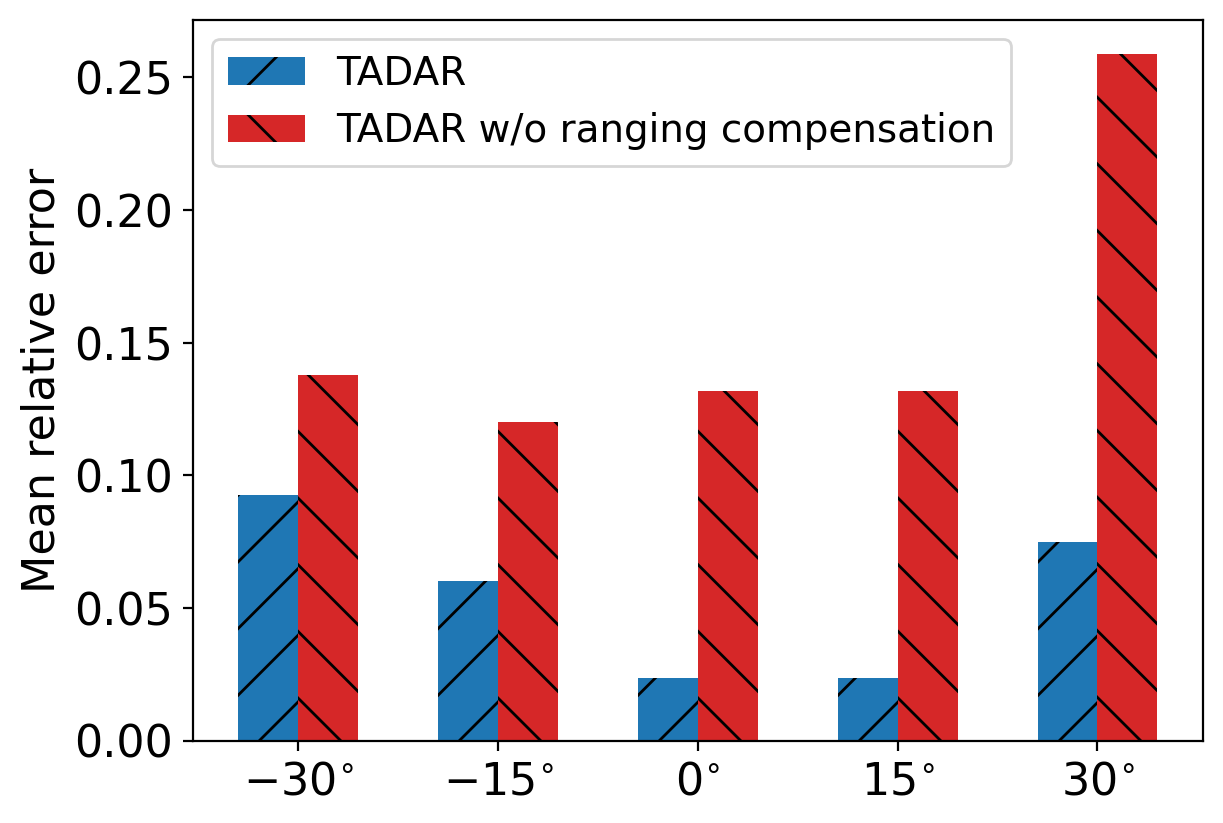

[0.09252403614380916, 0.06012922436929006, 0.023567198487608586, 0.023567198487608586, 0.07469108032180431]
[0.13790216694353624, 0.11992877400763353, 0.13176177448008822, 0.13176177448008822, 0.25883655786190984]


In [12]:
m30Deg = [
    'Outputs/HW101_Inangle_m30D_0_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_1_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_2_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_3_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_4_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_5_sensor_1.pkl',
    'Outputs/HW101_Inangle_m30D_3_sensor_4.pkl',
    'Outputs/HW101_Inangle_m30D_4_sensor_4.pkl',
    'Outputs/HW101_Inangle_m30D_5_sensor_4.pkl',
]

m15Deg = [
    'Outputs/HW101_Inangle_m15D_1_sensor_1.pkl',
    'Outputs/HW101_Inangle_m15D_3_sensor_1.pkl',
    'Outputs/HW101_Inangle_m15D_3_sensor_4.pkl',
]

N0Deg = [
    'Outputs/HW101_Inangle_15D_0_sensor_1.pkl',
    'Outputs/HW101_Inangle_15D_1_sensor_1.pkl',
    'Outputs/HW101_Inangle_15D_2_sensor_1.pkl',
]

p15Deg = [
    'Outputs/HW101_Inangle_15D_0_sensor_1.pkl',
    'Outputs/HW101_Inangle_15D_1_sensor_1.pkl',
    'Outputs/HW101_Inangle_15D_2_sensor_1.pkl',
]

p30Deg = [
    'Outputs/HW101_Inangle_30D_0_sensor_1.pkl',
    'Outputs/HW101_Inangle_30D_1_sensor_1.pkl',
    'Outputs/HW101_Inangle_30D_2_sensor_1.pkl',
]

performance_infrange_are = []
performance_temperatureOnly_are = []
incident_angles = [m30Deg, m15Deg, N0Deg, p15Deg, p30Deg]
for ele in incident_angles:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    range_KF_smoothed_prediction = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        range_KF_smoothed_prediction += output['range_KF_smoothed_prediction']
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    range_KF_smoothed_prediction = np.array(range_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]
    range_KF_smoothed_prediction = range_KF_smoothed_prediction[Valid_indices]

    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range2_KF_smoothed_prediction ,GT)
    performance_infrange_are.append(range_are)
    range_are, range_are_std = AverageRelativeError(range_KF_smoothed_prediction ,GT)
    performance_temperatureOnly_are.append(range_are)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.3  # the width of the bars
plt.bar(np.arange(len(performance_infrange_are))+ width*(-0.5) , performance_infrange_are, width,label='TADAR', color="tab:blue", hatch="/")
plt.bar(np.arange(len(performance_temperatureOnly_are))+ width*(0.5) , performance_temperatureOnly_are,width, label='TADAR w/o ranging compensation', color='tab:red', hatch="\\")
plt.xticks(np.arange(len(performance_temperatureOnly_are)), ['$-30^{\circ}$', '$-15^{\circ}$', '$0^{\circ}$', '$15^{\circ}$', '$30^{\circ}$'])
plt.rcParams.update({'font.size': 14})
plt.legend(loc='upper left')
plt.ylabel('Mean relative error')
# plt.ylim([0,1])

# plt.savefig("figures/cross-incidentangle-range3" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-incidentangle-range3" +'.pdf')
# plt.close()

plt.show() 

print(performance_infrange_are)
print(performance_temperatureOnly_are)

# Figure Cross-light Condition Performance

100%|██████████| 3/3 [00:00<00:00, 241.32it/s]


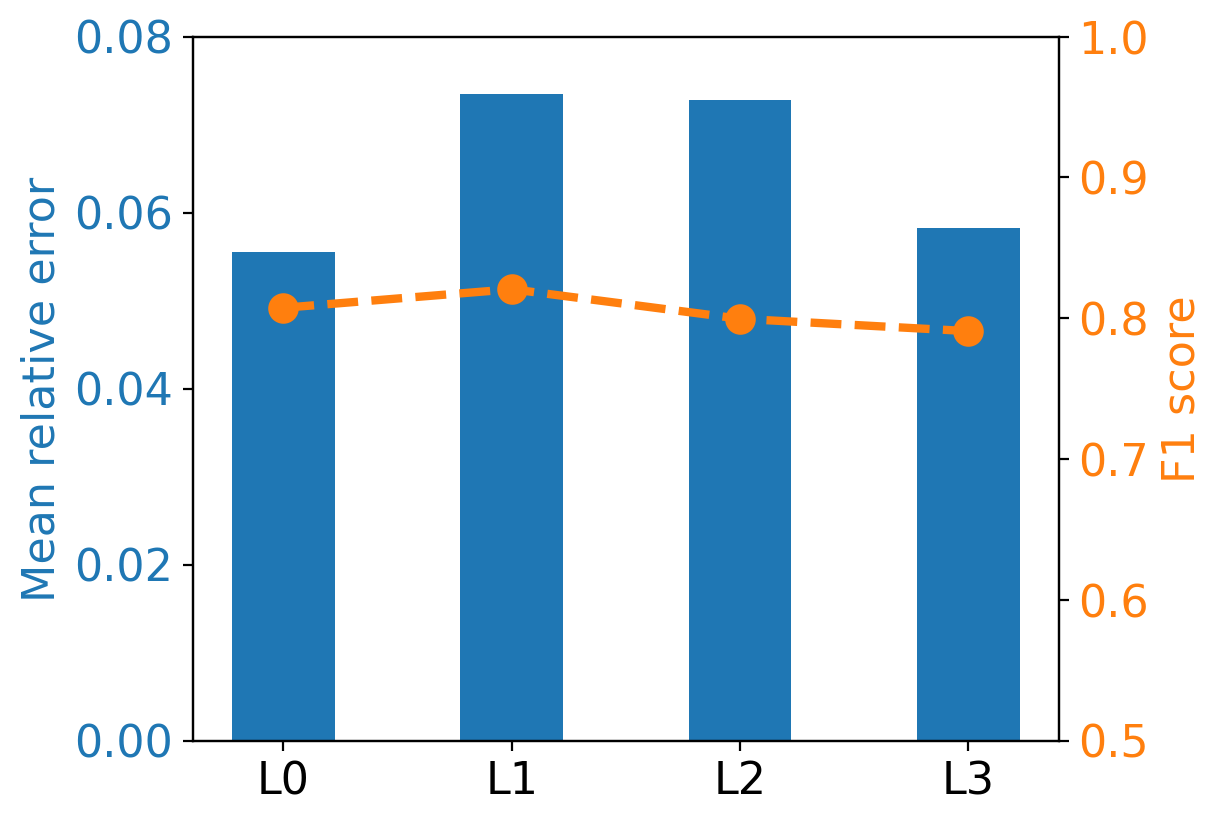

[0.05553022028825147, 0.07345030928439586, 0.07277352674281175, 0.05822735446371135]
[0.8074074074074074, 0.8206023570493234, 0.7996127783155859, 0.7908415841584157]


In [13]:
l0 = [
    'Outputs/HW101_LightCond0_0_sensor_1.pkl',
]

l1 = [
    'Outputs/HW101_LightCond1_0_sensor_1.pkl',
    'Outputs/HW101_LightCond1_1_sensor_1.pkl',
    'Outputs/HW101_LightCond1_2_sensor_1.pkl',
]

l2 = [
    'Outputs/HW101_LightCond2_0_sensor_1.pkl',
    'Outputs/HW101_LightCond2_1_sensor_1.pkl',
    'Outputs/HW101_LightCond2_2_sensor_1.pkl',
]

l3 = [
    'Outputs/HW101_LightCond3_0_sensor_1.pkl',
    'Outputs/HW101_LightCond3_1_sensor_1.pkl',
    'Outputs/HW101_LightCond3_2_sensor_1.pkl',
]

performance_are = []
performance_are_std = []
performance_f1score = []
lightconditions = [l0, l1, l2, l3]
for ele in lightconditions:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
    
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0.5, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0, 0.08])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), ['L0', 'L1', 'L2', 'L3'])

# plt.savefig("figures/cross-LightCondition-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-LightCondition-range2" +'.pdf')
# plt.close()

plt.show() 

print(performance_are)
print(performance_f1score)

# Impact of ambient objects

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 150.83it/s]


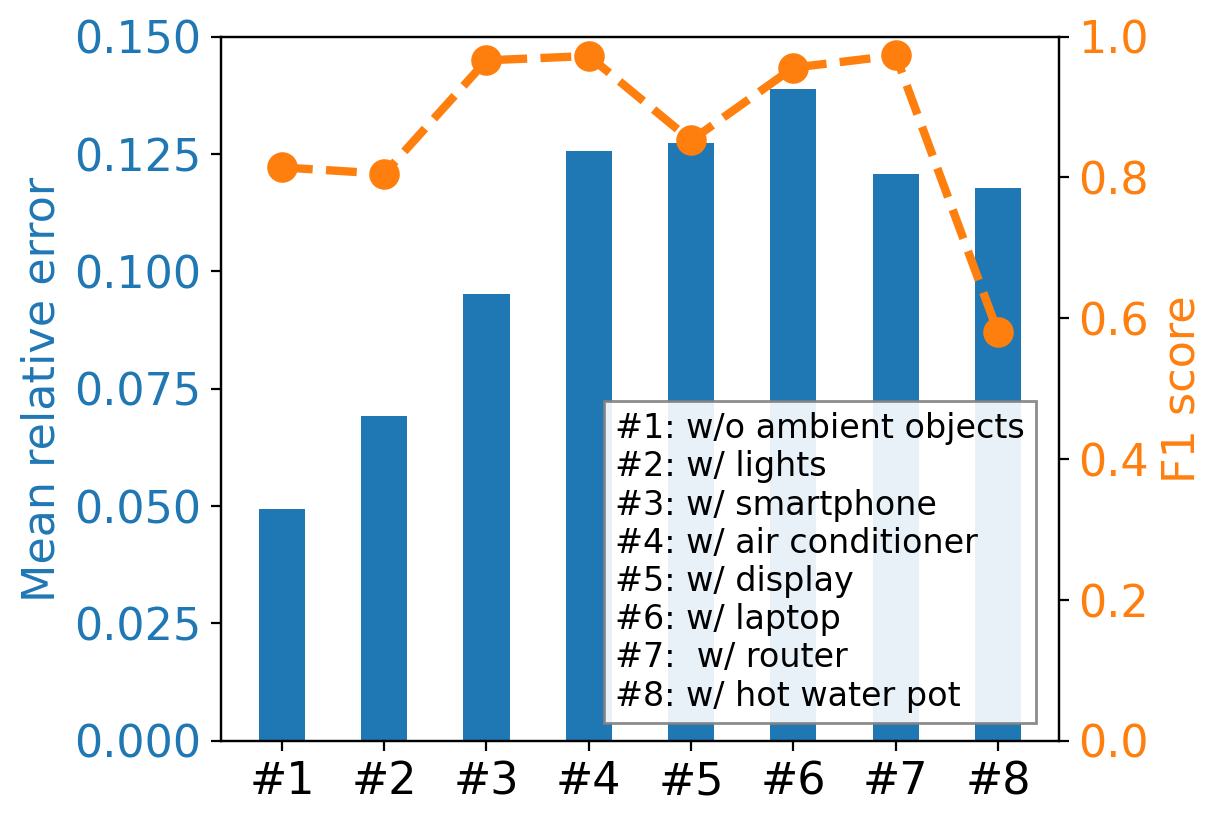

[0.04935300096795498, 0.06917318225330818, 0.09524963129542581, 0.1257152377052485, 0.12732883464623607, 0.13880346490725068, 0.12071949173289004, 0.11767932743843396]
[0.8142783238489394, 0.8052904737987612, 0.9663366336633663, 0.972617166929963, 0.8525191858525192, 0.95600624024961, 0.9733656174334141, 0.580319803198032]
[0.8648351648351649, 0.8748635867588214, 0.9937060348019252, 0.9892876272094269, 0.9452460229374768, 0.9557080474111042, 0.9812855980471928, 0.9519774011299436]
[0.7693059628543499, 0.7459677419354839, 0.9404344779257183, 0.9564992232004143, 0.7763597690671529, 0.9563046192259675, 0.9655724579663731, 0.4173743807501769]


In [14]:
from matplotlib.lines import Line2D

woAO = [                              # without ambient objects
    'Outputs/HW101_LightCond0_0_sensor_1.pkl',
    'Outputs/HW101_LightCond0_1_sensor_1.pkl',
    'Outputs/HW101_LightCond0_2_sensor_1.pkl',
    ]

wAC = [
    'Outputs/HW101_AmbientObjects_AC_0_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_AC_1_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_AC_0_sensor_1.pkl',
    'Outputs/HW101_AmbientObjects_AC_1_sensor_1.pkl',
]

wDisplay = [
    'Outputs/HW101_AmbientObjects_display_0_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_display_1_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_display_2_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_display_0_sensor_1.pkl',
    'Outputs/HW101_AmbientObjects_display_1_sensor_1.pkl',
    'Outputs/HW101_AmbientObjects_display_2_sensor_1.pkl',
    
]

wHotWaterPot = [
    'Outputs/HW101_AmbientObjects_hotwaterpot_0_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_hotwaterpot_1_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_hotwaterpot_2_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_hotwaterpot_0_sensor_1.pkl',
    'Outputs/HW101_AmbientObjects_hotwaterpot_1_sensor_1.pkl',
    'Outputs/HW101_AmbientObjects_hotwaterpot_2_sensor_1.pkl',
]

wLaptop = [
    'Outputs/HW101_AmbientObjects_laptop_0_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_laptop_1_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_laptop_2_sensor_4.pkl',
]

wLights = [
    'Outputs/HW101_LightCond1_0_sensor_1.pkl',
    'Outputs/HW101_LightCond1_1_sensor_1.pkl',
    'Outputs/HW101_LightCond1_2_sensor_1.pkl',
    'Outputs/HW101_LightCond2_0_sensor_1.pkl',
    'Outputs/HW101_LightCond2_1_sensor_1.pkl',
    'Outputs/HW101_LightCond2_2_sensor_1.pkl',
    'Outputs/HW101_LightCond3_0_sensor_1.pkl',
    'Outputs/HW101_LightCond3_1_sensor_1.pkl',
    'Outputs/HW101_LightCond3_2_sensor_1.pkl',
]

wRouter = [
    'Outputs/HW101_AmbientObjects_router_0_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_router_1_sensor_4.pkl',
    'Outputs/HW101_AmbientObjects_router_2_sensor_4.pkl',
]

wCellphone = [
    'Outputs/HW101_W_phone2_sensor_1.pkl',
    'Outputs/HW101_W_phone2_sensor_4.pkl',
    'Outputs/HW101_W_phone3_sensor_4.pkl',
]

performance_are = []
performance_are_std = []
performance_f1score = []
performance_recall = []
performacne_precision = []
AmbientObjects = [woAO, wLights, wCellphone, wAC, wDisplay, wLaptop, wRouter, wHotWaterPot,]  # 
for ele in AmbientObjects:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
    
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    performance_recall.append(recall)
    performacne_precision.append(precision)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
# rotate xticks
# plt.xticks(rotation=45)
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0, 0.15])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

texts = ['#1: w/o ambient objects',
         '#2: w/ lights',
         '#3: w/ smartphone',
         '#4: w/ air conditioner',
         '#5: w/ display',
         '#6: w/ laptop',
         '#7:  w/ router',
         '#8: w/ hot water pot']

text = '\n'.join(texts)

# Define starting position and space between texts
start_x, start_y = 0.47, 0.05
plt.gca().text(start_x, start_y, text, transform=plt.gca().transAxes,
                   fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.9))

plt.xticks(np.arange(len(performance_are)), ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8'])

# plt.savefig("figures/cross-AmbientObjects-range1" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-AmbientObjects-range1" +'.pdf')
# plt.close()

plt.show() 

print(performance_are)
print(performance_f1score)
print(performance_recall)
print(performacne_precision)

# Figure mask-hat impact


100%|██████████| 1/1 [00:00<00:00, 77.65it/s]


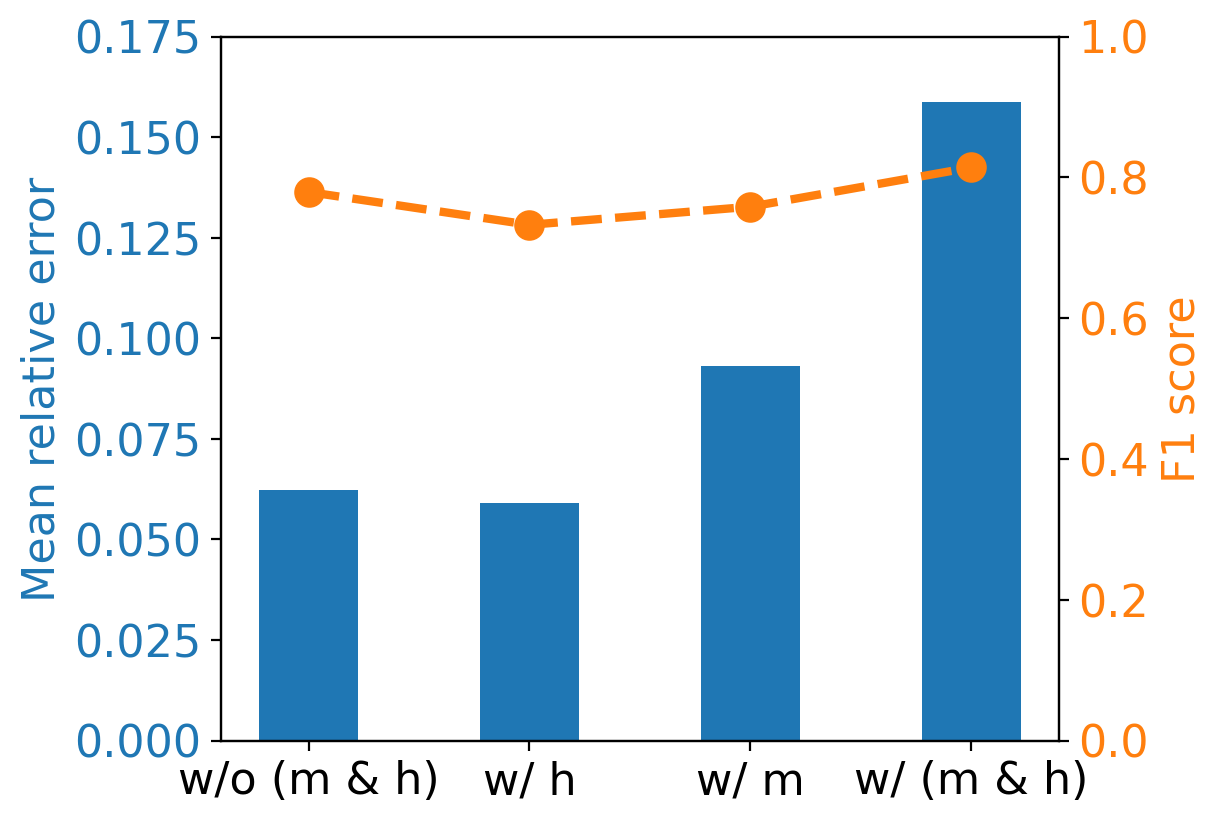

[0.062284268368719954, 0.058992754627057435, 0.09305758039161245, 0.15879446151382057]
[0.7792869269949068, 0.7327061427780852, 0.7583979328165374, 0.8141825344714381]


In [15]:
NoMaskHat = [
    'Outputs/HW101set25_sensor_1.pkl',
]

Mask = [
    'Outputs/HW101set26_sensor_1.pkl',
]

Hat = [
    'Outputs/HW101set27_sensor_1.pkl',
]

MaskHat = [
    'Outputs/HW101set28_sensor_1.pkl',
]

performance_are = []
performance_are_std = []
performance_f1score = []
maskhats = [NoMaskHat, Hat, Mask, MaskHat]
for ele in maskhats:
    GT_range = []
    GT_depth = []
    range2_KF_smoothed_prediction = []
    TruePositive = []
    FalsePositive = []
    FalseNegtive = []
    for file_path in tqdm(ele):
        file = open(file_path, "rb")
        output = pickle.load(file)
        file.close()
        GT_range += output['GT_range']
        GT_depth += output['GT_depth']
        range2_KF_smoothed_prediction += output['range2_KF_smoothed_prediction']
        TruePositive += output['TruePositive']
        FalsePositive += output['FalsePositive']
        FalseNegtive += output['FalseNegtive']
    
    TP = np.sum(np.array(TruePositive))
    FP = np.sum(np.array(FalsePositive))
    FN = np.sum(np.array(FalseNegtive))
    precision, recall, F1_score = DetectionMeasurements(TP, FP, FN)
    performance_f1score.append(F1_score)
    
    GT_range = np.array(GT_range)
    GT_depth = np.array(GT_depth)
    range2_KF_smoothed_prediction = np.array(range2_KF_smoothed_prediction)
    GT_range_indices = np.where((GT_range > 0.5) & (GT_range <= 5))
    GT_depth_indices = np.where((GT_depth > 0.5) & (GT_depth <= 5))
    Valid_indices = np.intersect1d(GT_range_indices, GT_depth_indices)

    GT_range = GT_range[Valid_indices]
    GT_depth = GT_depth[Valid_indices]
    range2_KF_smoothed_prediction = range2_KF_smoothed_prediction[Valid_indices]

    range_prediction = range2_KF_smoothed_prediction
    GT = np.array(GT_range)
    range_are, range_are_std = AverageRelativeError(range_prediction ,GT)
    performance_are.append(range_are)
    performance_are_std.append(range_are_std)


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
ax2 = ax.twinx()
ax2.set_ylabel('F1 score', color="tab:orange")
ax2.set_ylim([0, 1])
ax2.plot(np.arange(len(performance_f1score)), performance_f1score, label='Detection F1 score', color="tab:orange", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:orange")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0, 0.175])
ax.set_ylabel('Mean relative error', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), ['w/o (m & h)', 'w/ h', 'w/ m', 'w/ (m & h)'])

# plt.savefig("figures/cross-maskhat-range2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/cross-maskhat-range2" +'.pdf')
# plt.close()

plt.show() 

print(performance_are)
print(performance_f1score)

# Figure model selection

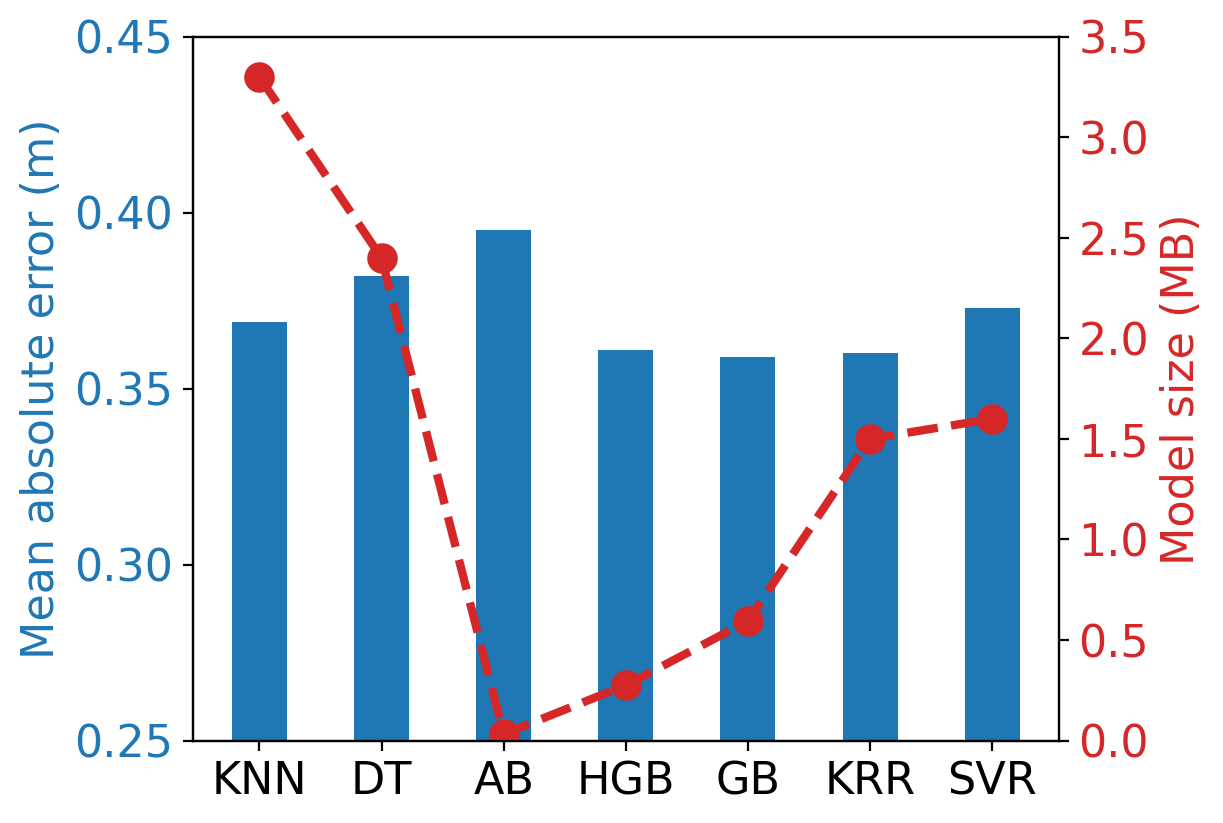

In [16]:

performance_are = [0.369, 0.382, 0.395, 0.361, 0.359, 0.360, 0.373]
model_size = [3.3, 2.4, 0.032, 0.275, 0.594, 1.5, 1.6]
model_name = ['KNN', 'DT', 'AB', 'HGB', 'GB', 'KRR', 'SVR']

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# add line chart to represent the performance_f1score with another y-axis
ax2 = ax.twinx()
ax2.set_ylabel('Model size (MB)', color="tab:red")
ax2.set_ylim([0, 3.5])
ax2.plot(np.arange(len(model_size)), model_size, label='mdoel size', color="tab:red", linewidth=3, linestyle='--', marker='o', markersize=10)
ax2.tick_params(axis='y', labelcolor="tab:red")
ax2.set_zorder(2)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0.25, 0.45])
ax.set_ylabel('Mean absolute error (m)', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")

plt.xticks(np.arange(len(performance_are)), model_name)

# plt.savefig("figures/Ablation-model-selection2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/Ablation-model-selection2" +'.pdf')
# plt.close()

plt.show() 

# Figure ROI shape selection

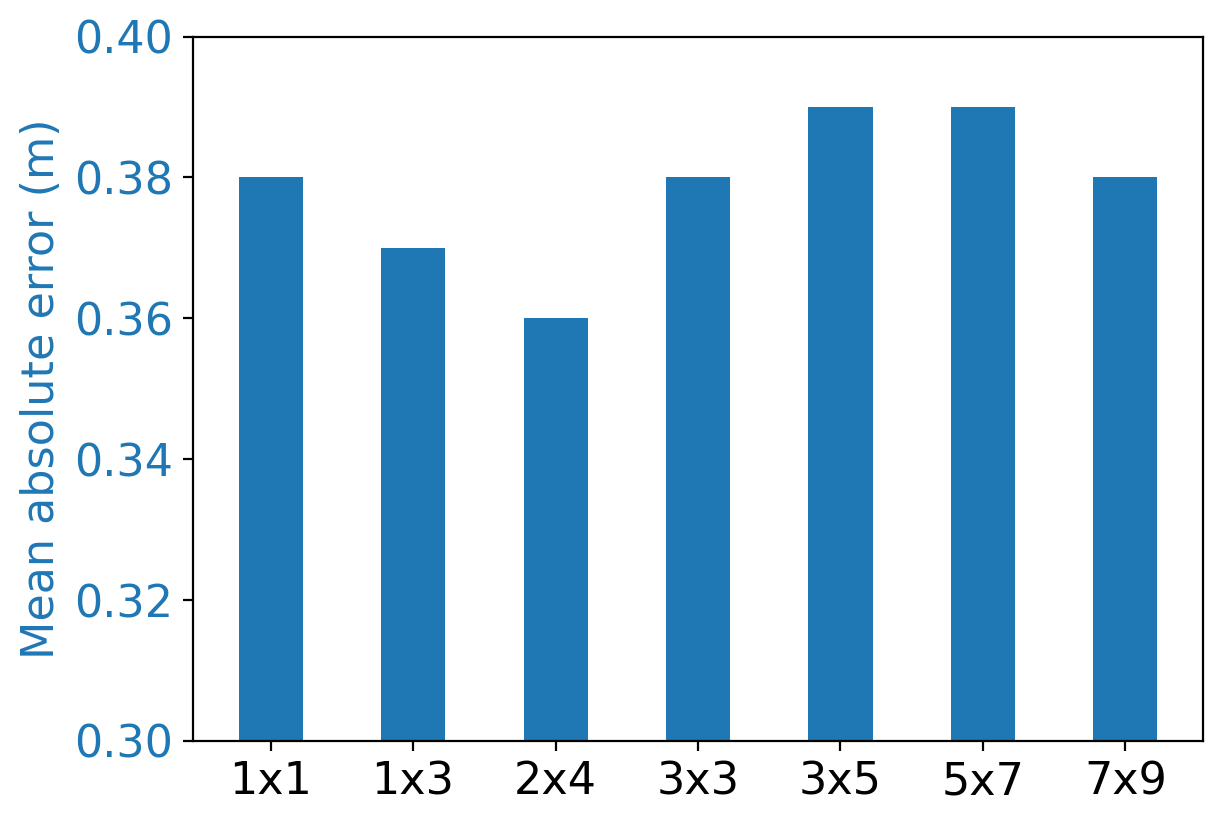

In [17]:

performance_are = [0.38, 0.37, 0.36, 0.38, 0.39, 0.39, 0.38]
model_name = ['1x1', '1x3', '2x4', '3x3', '3x5', '5x7', '7x9']

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize = (6,4),dpi=200, layout='constrained')
width = 0.45  # the width of the bars
# ax.patch.set_visible(False)
ax.bar(np.arange(len(performance_are)), performance_are, width,label='Range error', color='tab:blue',)
ax.set_ylim([0.3, 0.4])
ax.set_ylabel('Mean absolute error (m)', color="tab:blue")
ax.tick_params(axis='y', labelcolor="tab:blue")
plt.xticks(np.arange(len(performance_are)), model_name)

# plt.savefig("figures/Ablation-ROI-selection2" + ".png",dpi=200,bbox_inches = 'tight')
# plt.savefig("figures/Ablation-ROI-selection2" +'.pdf')
# plt.close()

plt.show() 